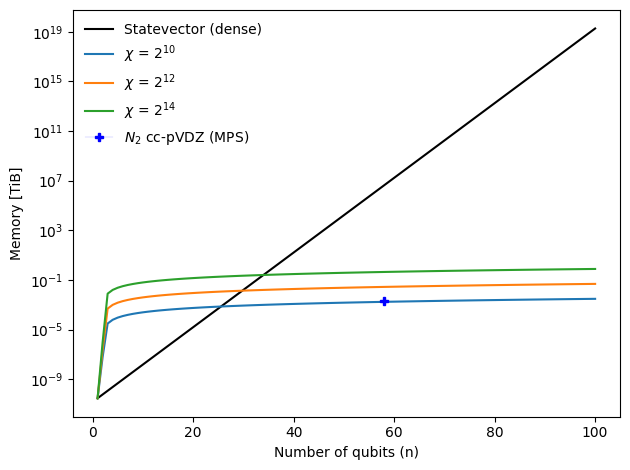

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

def statevector_bytes(n_qubits: int, bytes_per_complex: int = 16) -> int:
    return (1 << int(n_qubits)) * bytes_per_complex

def mps_elements(n_qubits: int, chi: int, d: int = 2) -> int:
    if n_qubits <= 0:
        return 0
    if n_qubits == 1:
        return d  # single site (1,d,1)
    # open boundary: (1,d,chi), (chi,d,chi) x (n-2), (chi,d,1)
    return 2 * d * chi + (n_qubits - 2) * d * chi * chi

def mps_bytes(n_qubits: int, chi: int, bytes_per_complex: int = 16, d: int = 2) -> int:
    return mps_elements(n_qubits, chi, d) * bytes_per_complex

# Settings
dtype_bytes = 16  # 16 for complex128, 8 for complex64
chis = [(2**10, r"$2^{10}$"), (2**12, r"$2^{12}$"), (2**14, r"$2^{14}$")]  # choose any set you like

n = np.arange(1, 100 + 1, 1)

# Plot
plt.figure()
# Statevector
sv_mib = np.array([statevector_bytes(k, dtype_bytes) for k in n]) / (1024**4)
plt.semilogy(n, sv_mib, label="Statevector (dense)", c='k')
# MPS curves
for chi, label in chis:
    mps_mib = np.array([mps_bytes(k, chi, dtype_bytes) for k in n]) / (1024**4)
    plt.semilogy(n, mps_mib, label=r"$\chi$ = " + label)

plt.plot(58, 1.9e-3, lw=0.1,marker='P',c='b', label=r"$N_2$ cc-pVDZ (MPS)")


plt.xlabel("Number of qubits (n)")
plt.ylabel("Memory [TiB]")
plt.legend(framealpha=0.0)
plt.tight_layout()
tikzplotlib.save( "figures/memory.tex", axis_width="\\linewidth", axis_height="0.5\\linewidth", textsize=8, 
                 extra_axis_parameters=[ "tick label style={font=\\scriptsize}", 
                                        "label style={font=\\footnotesize}", 
                                        "legend style={font=\\scriptsize}"])
